<a href="https://colab.research.google.com/github/Srishti6125/XOR-Neural-Network/blob/main/XOR_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###NumPy vs Keras XOR Neural Network

In [1]:
# libraries
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#### Numpy

In [2]:
# neural network using numpy

# inputs
X= np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Outputs (XOR)
y = np.array([[0],
              [1],
              [1],
              [0]])

input_dim = 2     # 2 inputs (input layer)
hidden_dim = 2    # two hidden neurons (hidden layer)
output_dim = 1    # single output (output layer)

# Hyperparameters
learning_rate = 1.0
epochs = 10000

# small random values
np.random.seed(42)  # for reproducibility

W1 = np.random.uniform(-1, 1, (input_dim, hidden_dim))     # (2 x 2)
W2 = np.random.uniform(-1, 1, (hidden_dim, output_dim))    # (2 x 1)

b1 = np.zeros((1, hidden_dim))    # (1 x 2)
b2 = np.zeros((1, output_dim))    # (1 x 1)

# activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):        # a is sigmoid(z)
    return a * (1 - a)

# training loop

for epoch in range(epochs):

    # ---- FORWARD PASS ----
    # Hidden layer
    z1 = np.dot(X, W1) + b1        # (4 x 2)
    a1 = sigmoid(z1)               # (4 x 2)
    # Output layer
    z2 = np.dot(a1, W2) + b2       # (4 x 1)
    a2 = sigmoid(z2)               # (4 x 1) -> predictions

    # ---- LOSS (Binary Cross Entropy) ----
    eps = 1e-8      # small epsilon to avoid log(0)
    loss = -np.mean(y * np.log(a2 + eps) + (1 - y) * np.log(1 - a2 + eps))

    # ---- BACKPROPAGATION ----
    # Output layer error
    dz2 = a2 - y   # (4 x 1)

    # Gradients for W2 and b2
    dW2 = np.dot(a1.T, dz2) / X.shape[0]           # (2 x 1)
    db2 = np.mean(dz2, axis=0, keepdims=True)      # (1 x 1)

    # Hidden layer error
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)  # (4 x 2)

    # Gradients for W1 and b1
    dW1 = np.dot(X.T, dz1) / X.shape[0]            # (2 x 2)
    db1 = np.mean(dz1, axis=0, keepdims=True)      # (1 x 2)

    # ---- UPDATE WEIGHTS ----
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print loss occasionally
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

#  Evaluating trained model
print("\nFinal predictions after training:")
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

print("Inputs:\n", X)
print("True labels:\n", y)
print("\n\nRaw outputs (probabilities):\n", a2)
print("Rounded predictions:\n", np.round(a2))

Epoch 1000/10000, Loss: 0.0567
Epoch 2000/10000, Loss: 0.0138
Epoch 3000/10000, Loss: 0.0077
Epoch 4000/10000, Loss: 0.0053
Epoch 5000/10000, Loss: 0.0041
Epoch 6000/10000, Loss: 0.0033
Epoch 7000/10000, Loss: 0.0028
Epoch 8000/10000, Loss: 0.0024
Epoch 9000/10000, Loss: 0.0021
Epoch 10000/10000, Loss: 0.0019

Final predictions after training:
Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
True labels:
 [[0]
 [1]
 [1]
 [0]]


Raw outputs (probabilities):
 [[0.00163529]
 [0.99781729]
 [0.99781753]
 [0.00146835]]
Rounded predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


#### Keras-Tensorflow

In [3]:
# neural network using tensorflow-keras

# Input
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

# Output
y = np.array([
    [0],
    [1],
    [1],
    [0]
], dtype=np.float32)

# Building model
model = Sequential([
    Dense(2, activation='tanh', input_dim=2),  # hidden layer with 2 neurons
    Dense(1, activation='sigmoid')             # output layer
])
optimizer = Adam(learning_rate=0.1)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training model
history = model.fit(
    X, y,
    epochs=5000,        # small dataset, lots of epochs is fine
    batch_size=4,       # all 4 samples at once
    verbose=0           # set to 1 if you want to see logs
)

# Evaluation and prediction
loss, acc = model.evaluate(X, y, verbose=0)
print(f"\nFinal training loss: {loss:.6f}, accuracy: {acc:.4f}")

y_pred = model.predict(X)
print("Inputs:\n", X)
print("True labels:\n", y)
print("\n\nRaw outputs (probabilities):\n", y_pred)
print("Rounded predictions:\n", np.round(y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)


Final training loss: 0.000010, accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Inputs:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
True labels:
 [[0.]
 [1.]
 [1.]
 [0.]]


Raw outputs (probabilities):
 [[1.42962308e-05]
 [9.99993801e-01]
 [9.99994040e-01]
 [1.18210455e-05]]
Rounded predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


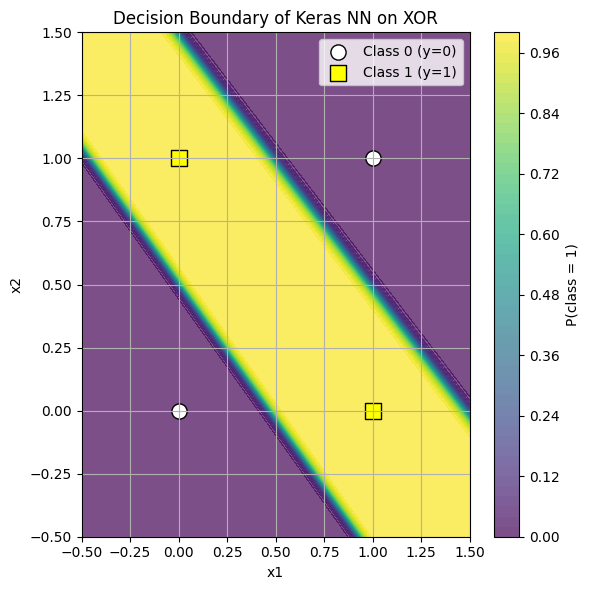

In [9]:
# plotting decision boundary
import matplotlib.pyplot as plt

# Create a grid over the input space
resolution = 300

x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, resolution),
    np.linspace(y_min, y_max, resolution)
)

grid_points = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

# Get model predictions over the grid
grid_pred = model.predict(grid_points, verbose=0)  # shape (N, 1)
grid_pred = grid_pred.reshape(xx.shape)            # reshape to match meshgrid

# Plot decision boundary
plt.figure(figsize=(6, 6))

# Background: decision regions (0 vs 1)
contour = plt.contourf( xx, yy, grid_pred, levels=50, alpha=0.7 )
plt.colorbar(contour, label="P(class = 1)")

# Overlay actual XOR data points
idx_0 = (y.ravel() == 0)    # Class 0 points
plt.scatter( X[idx_0, 0], X[idx_0, 1], marker='o', edgecolors='k', facecolors='white', s=120, label='Class 0 (y=0)' )

idx_1 = (y.ravel() == 1)    # Class 1 points
plt.scatter( X[idx_1, 0], X[idx_1, 1], marker='s', edgecolors='k', facecolors='yellow', s=120, label='Class 1 (y=1)' )

plt.title("Decision Boundary of Keras NN on XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**Summary**

Both implementations successfully learned the XOR function with 100% accuracy, but they serve different purposes:

NumPy version :-

- Full manual neural network: forward pass, backpropagation, and gradient updates
- Best for understanding how neural networks actually learn
- Gives complete control and visibility into weights, gradients, and learning rate effects

Keras/TensorFlow version :-
- High-level, compact architecture with automatic differentiation
- Uses the Adam optimizer for fast and stable convergence
- Best for real-world development, scalability, and rapid experimentation

Despite different training pipelines, both models learned identical decision boundaries, proving that high-level frameworks and low-level math ultimately converge to the same solution, just with different levels of abstraction.